In [1]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso/")
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries
from color_series1 import colors
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/"
print("data path: ", data_path)

level: mdanalysis & tutorial name: mdanalysis-tutorial
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/mdanalysis/


In [5]:
timestep = 0.001 * 100 # actual time in ps between 2 recorded frames
position = np.loadtxt(data_path + "position_vs_time.dat")
frame, x, y, z = position.T
time = timestep * frame # ps

In [12]:
all_marker_size = np.linspace(12, 1, len(frame))

In [34]:
R = colors["mycyan"][0] * np.linspace(1, 0, len(frame))
G = colors["mycyan"][1] * np.linspace(1, 0, len(frame))
B = colors["mycyan"][2] * np.linspace(1, 0, len(frame))

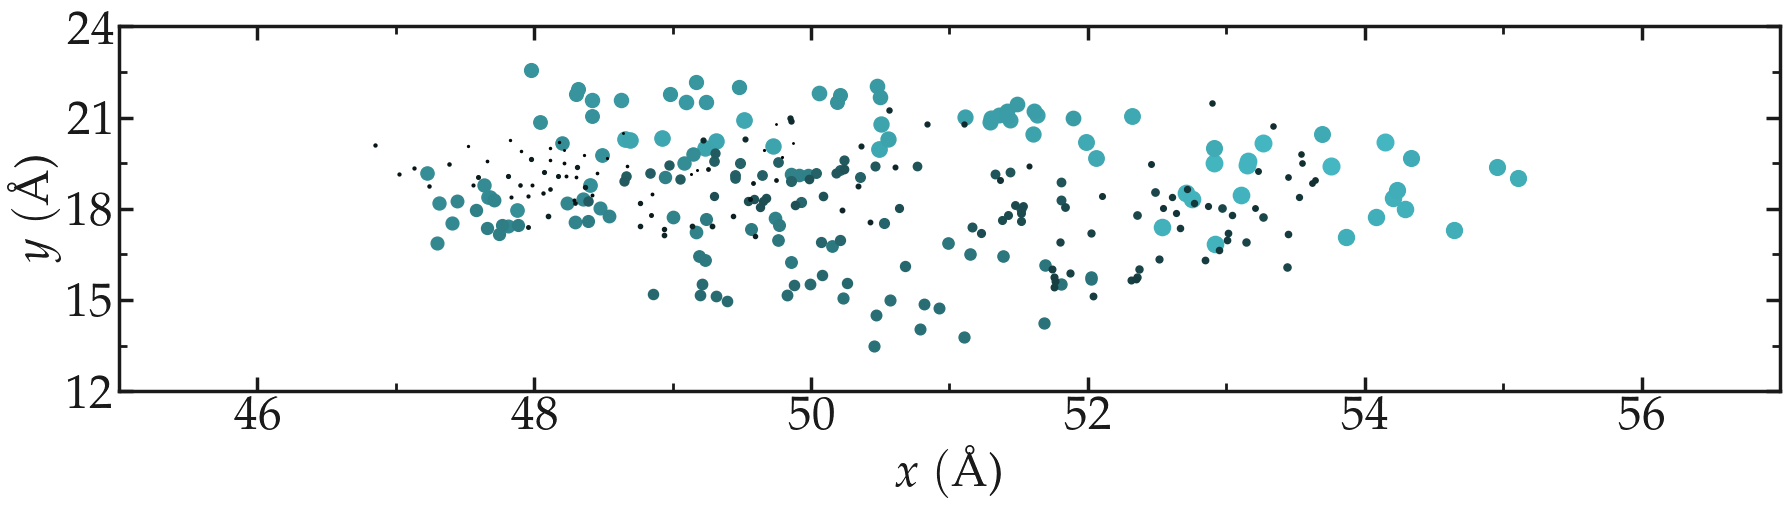

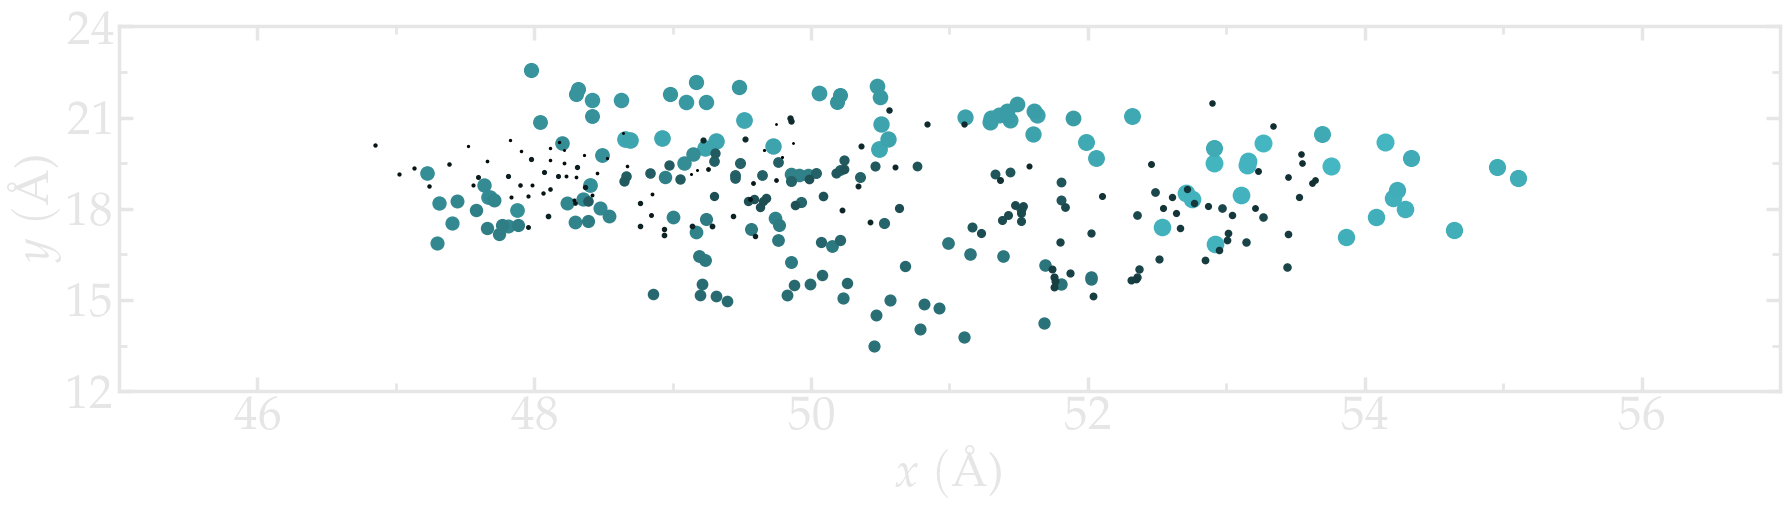

In [54]:
filename = "position-atom"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,9))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    for x0, y0, z0, marker, R0, G0, B0 in zip(x, y, z, all_marker_size, R, G, B):
        ax[-1].plot(x0, z0, 'o', color=np.array([R0, G0, B0]),
                    linewidth=3, markersize = marker)
    complete_panel(ax[-1], r'$x$ $(\mathrm{\AA}$)', r'$y$ $(\mathrm{\AA}$)',
                   legend=False, axis_color=mygray) #, cancel_x=True)
    set_boundaries(plt, x_ticks=np.arange(46, 58, 2), x_boundaries=(45, 57),
                   y_ticks=np.arange(12, 24.5, 3), y_boundaries=(12, 24))
    save_figure(plt, fig, mode, git_path, path_figures, filename)